In [61]:
import cluster4seed
import rsfc
import rsw
import numpy as np
import matplotlib.pyplot as plt

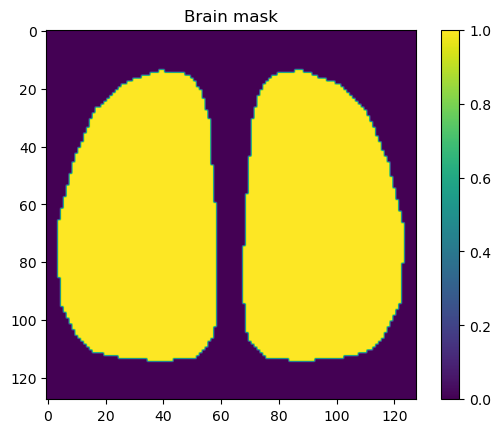

In [62]:
mask = np.load('demodata/mask.npy')
plt.imshow(mask)
plt.title("Brain mask")
plt.colorbar()

In [63]:
files = [['demodata/pv_p14_data_1.npy',
          'demodata/pv_p14_data_2.npy'],
         ['demodata/pv_p28_data_1.npy',
          'demodata/pv_p28_data_2.npy'],
         ['demodata/pv_p56_data_1.npy',
          'demodata/pv_p56_data_2.npy']]

In [64]:
rsfc_seed = []
for seed in rsfc.seed_points:
  print("Prepare for seed point: ", seed)
  rsfc_seed.append(rsfc.seed_pipeline(seed, files[0], files[1], files[2]))

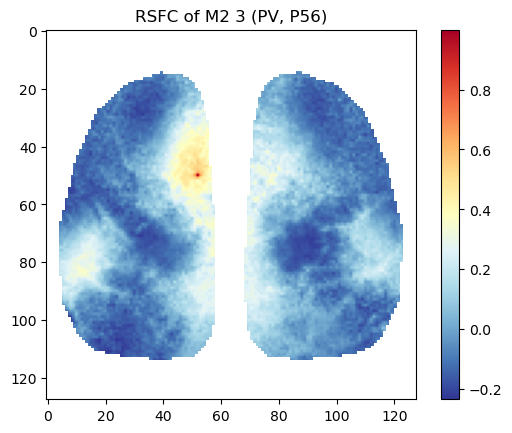

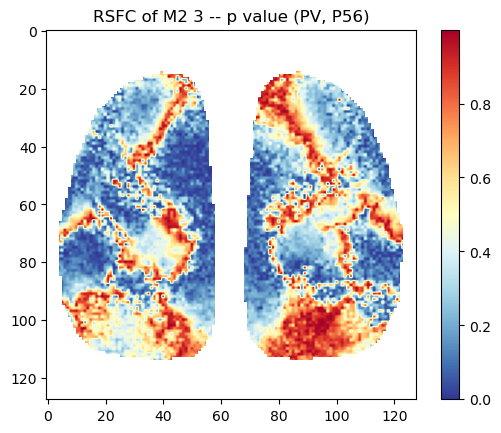

In [65]:
def rsfc_data_average(data):
  return np.mean([i[0] for i in data], axis=0)
(mask_c14, data_c14, data_c28, data_c56), (p_images, rejected_images, corrected_images) = rsfc_seed[0]
plt.imshow(rsfc_data_average(data_c56), cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC of M2 3 (PV, P56)")
plt.show()
plt.imshow(p_images[2], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC of M2 3 -- p value (PV, P56)")
plt.show()

In [66]:
corrcoef_matrix = [np.zeros((len(rsfc.seed_points), len(rsfc.seed_points))) for i in range(3)]
p_matrix = [np.zeros((len(rsfc.seed_points), len(rsfc.seed_points))) for i in range(3)]

for i, seed in enumerate(rsfc.seed_points):
  for j, m in enumerate(rsfc_seed):
    (mask_c14, data_c14, data_c28, data_c56), (p_images, rejected_images, corrected_images) = m
    corrcoef_matrix[0][i,j] = rsfc_data_average(data_c14)[seed[1],seed[2]]
    corrcoef_matrix[1][i,j] = rsfc_data_average(data_c28)[seed[1],seed[2]]
    corrcoef_matrix[2][i,j] = rsfc_data_average(data_c56)[seed[1],seed[2]]
    p_matrix[0][i,j] = p_images[0][seed[1],seed[2]]
    p_matrix[1][i,j] = p_images[1][seed[1],seed[2]]
    p_matrix[2][i,j] = p_images[2][seed[1],seed[2]]

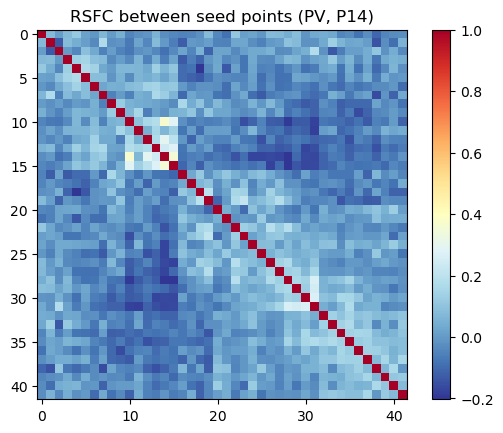

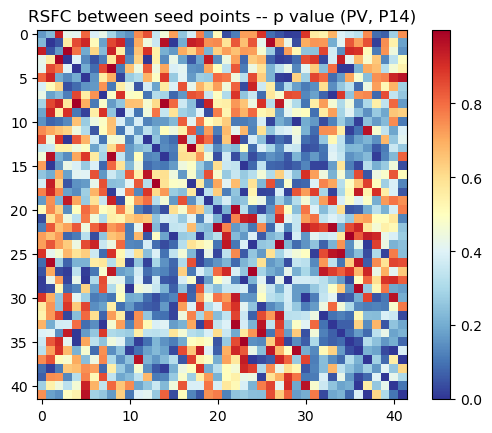

In [67]:
plt.imshow(corrcoef_matrix[0], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC between seed points (PV, P14)")
plt.show()
plt.imshow(p_matrix[0], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC between seed points -- p value (PV, P14)")
plt.show()

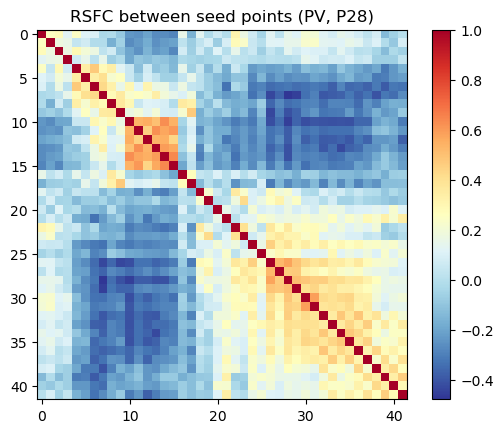

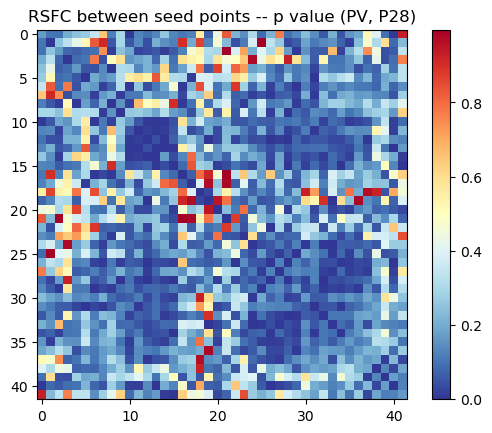

In [68]:
plt.imshow(corrcoef_matrix[1], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC between seed points (PV, P28)")
plt.show()
plt.imshow(p_matrix[1], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC between seed points -- p value (PV, P28)")
plt.show()

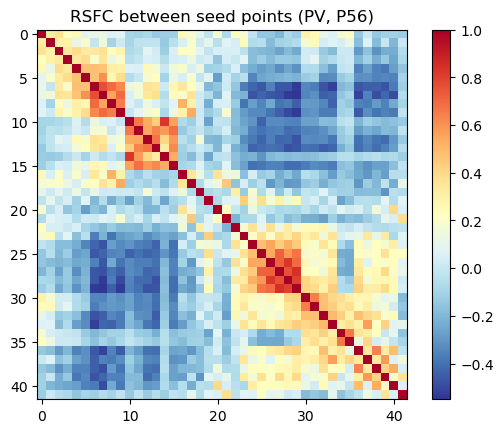

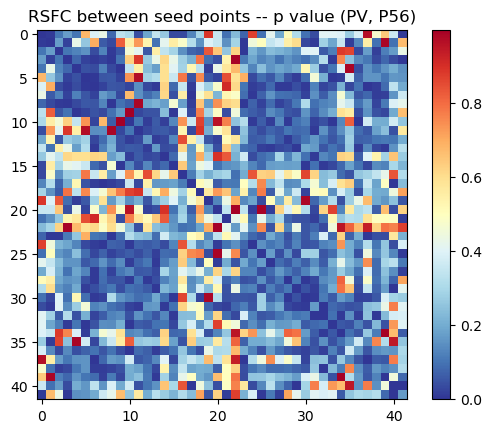

In [69]:
plt.imshow(corrcoef_matrix[2], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC between seed points (PV, P56)")
plt.show()
plt.imshow(p_matrix[2], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("RSFC between seed points -- p value (PV, P56)")
plt.show()

In [70]:
rsw_pv_p56 = rsw.cpca_pipeline(files[2])
strength_1 = rsw.cpca_strength(rsw_pv_p56, 0)
loading_1 = rsw.cpca_loading(rsw_pv_p56, 0, mask)
reconstruct_1 = rsw.cpca_reconstruct(rsw_pv_p56, 0, mask)

wave 1 explained variance (PV, P56):  0.29501414273186444


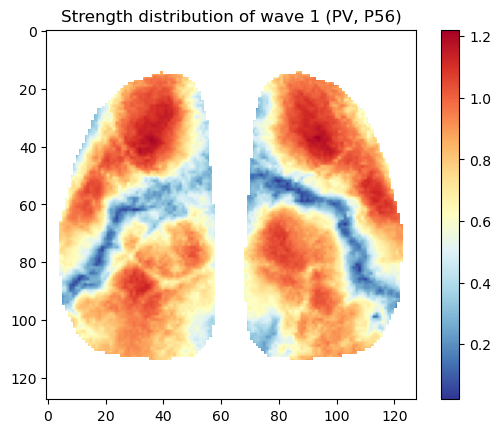

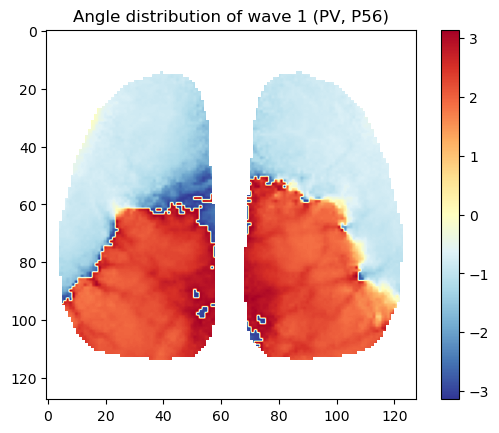

In [71]:
print("wave 1 explained variance (PV, P56): ", strength_1)
plt.imshow(np.abs(loading_1), cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("Strength distribution of wave 1 (PV, P56)")
plt.show()
plt.imshow(np.angle(loading_1), cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("Angle distribution of wave 1 (PV, P56)")
plt.show()

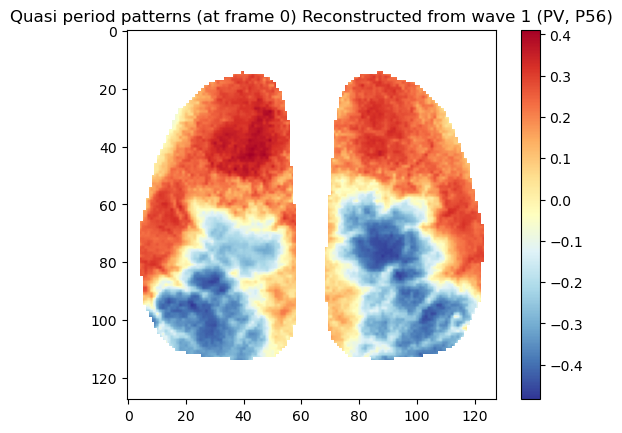

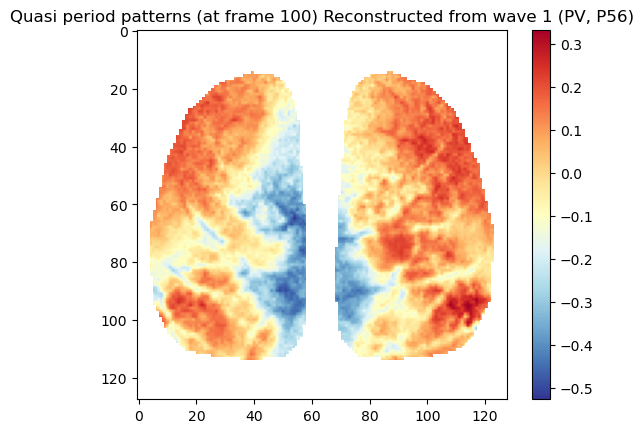

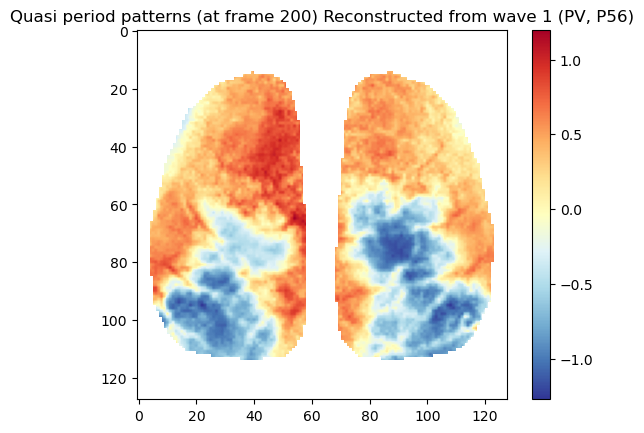

In [72]:
plt.imshow(reconstruct_1[:,:,0], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("Quasi period patterns (at frame 0) Reconstructed from wave 1 (PV, P56)")
plt.show()
plt.imshow(reconstruct_1[:,:,100], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("Quasi period patterns (at frame 100) Reconstructed from wave 1 (PV, P56)")
plt.show()
plt.imshow(reconstruct_1[:,:,200], cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.title("Quasi period patterns (at frame 200) Reconstructed from wave 1 (PV, P56)")
plt.show()